In [36]:
pwd

'C:\\Users\\admin\\Desktop\\Personal_stuff\\PROJECTS\\Proj2_Price model'

In [37]:
#Import and load the libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## Data Wrangling

In [72]:
#Loading the dataset with a function
def wrangle (filepath):
    #Load the CSV file into file path-local function applied
    df = pd.read_csv(filepath, encoding='ISO-8859-1')
    #To display 'Capital Federal' only 
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
    #To display 'Apartment' only 
    mask_apt = df["property_type"] == "apartment" 
    #To display price below'400,000'
    mask_price = df["price_aprox_usd"] < 400_000
    #Subset
    df = df[ mask_ba & mask_apt & mask_price]
    
    #Remove outliers by 'surface_area_m2' -----removing the 10th and 90th quantiles
    low = df["surface_covered_in_m2"].quantile(0.1)
    high = df["surface_covered_in_m2"].quantile(0.9)
    
    mask_area = df["surface_covered_in_m2"].between(low, high)
    
    df = df[mask_area]
    
    print('low = ', low, ';high = ', high)
    print('df.shape = ', df.shape)
    
    return df

In [73]:
#Load the CSV file into the filepath 
df = wrangle("C:\\Users\\admin\\Desktop\\Personal_stuff\\PROJECTS\\Proj2_Price model/buenos-aires-real-estate-1.csv")
print("df shape:", df.shape)
df.head()
df.info()

low =  31.0 ;high =  100.0
df.shape =  (1343, 17)
df shape: (1343, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 4 to 8604
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1343 non-null   int64  
 1   operation                   1343 non-null   object 
 2   property_type               1343 non-null   object 
 3   place_with_parent_names     1343 non-null   object 
 4   lat-lon                     1300 non-null   object 
 5   price                       1343 non-null   float64
 6   currency                    1343 non-null   object 
 7   price_aprox_local_currency  1343 non-null   float64
 8   price_aprox_usd             1343 non-null   float64
 9   surface_total_in_m2         965 non-null    float64
 10  surface_covered_in_m2       1343 non-null   float64
 11  price_usd_per_m2            927 non-null    float64
 12  price_per_m2       

The above information has been modelled within the function to only have the state of Capital Federal containing apartments below 400,000 USD. 

## Scatterplot
Finding a relationship between apartment size and price

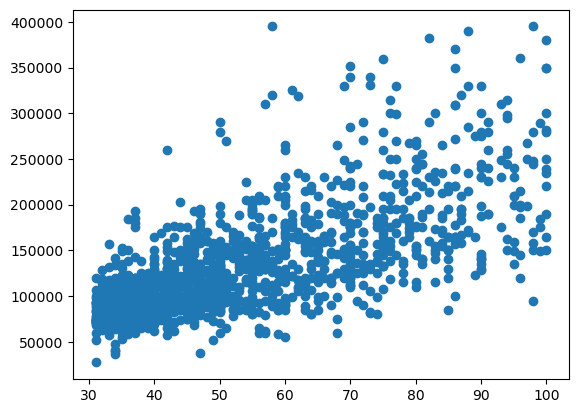

In [74]:
plt.scatter(x=df["surface_covered_in_m2"], y=df["price_aprox_usd"])
plt.xlabel = "Area [sq meters]"
plt.ylabel = "Price [USD]"
plt.title = "Area_m2 vs Price_usd"

There is a strong co-relation between the price and surface area covered in m2 for apartments costing less than 400,000 usd in Capital Federal state.

In [75]:
#Creating a copy of the dataframe for manipulation
dfcopy = df.copy()

In [76]:
dfcopy.head()

,Unnamed: 0,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,5,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,10,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,30,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,41,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,42,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...
